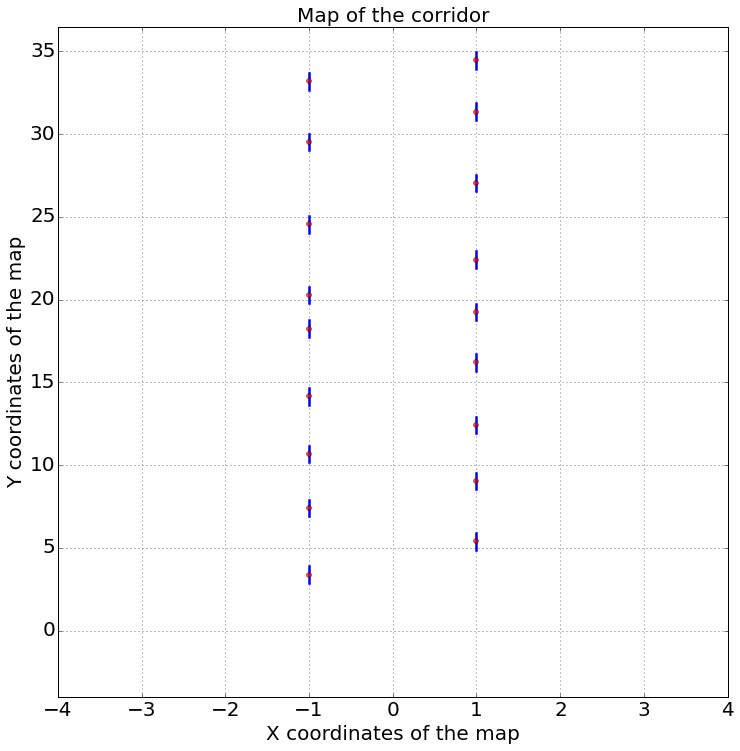

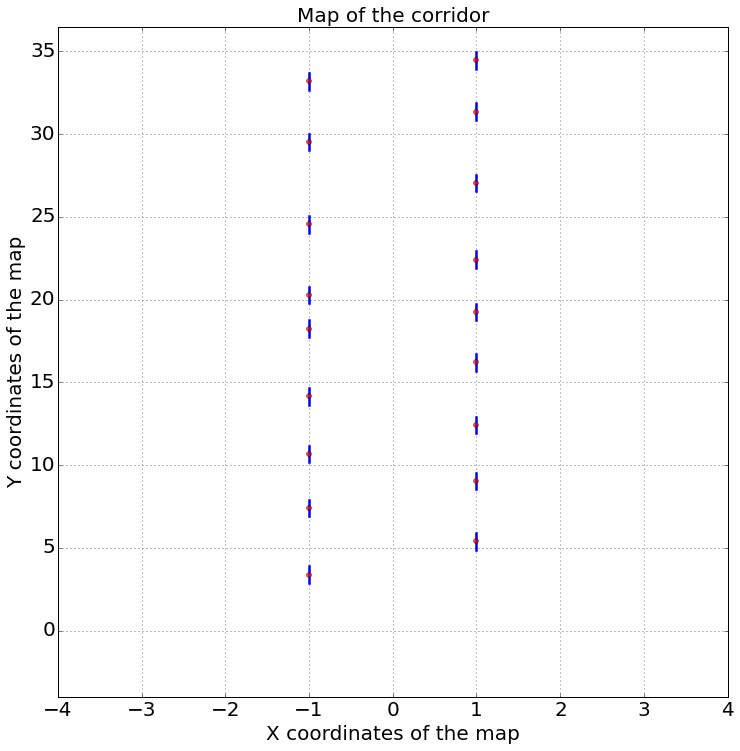

In [2]:
# Corridor Mapping

%run Corridor_planning.ipynb                          # Ground truth

from __future__ import division
import numpy as np
from IPython import display
from matplotlib.lines import Line2D

# Lets develop an EKF filter so that we can again estimate the collision points and use them as point landmarks. Later we can use
# an SVM/RVM classifier to separate these points. But the only problem is that there are going to several points and we have to 
# use individual filters for each of them. Even though line representation can perform better in this way which we tried to avoid
# in the above situation, we have to find a small cut through in this process. 

# Trajectory - Actual robot positions - Varialbe - xtraj and ytraj
# Observations - collision angles - Variable - obs
# Landmark positions - Variable - cor

# Hit observations when x=-1 and x=1
# Since we are trying yo do EKF, we directly obtain the absolute position of the landmarks as it is same as the robot position 
# at the instant of collision. Moreover, the mapping problem turns to be same as the localization problem.

# On calculating robot's orientation from the global coordinate frame using the slope of the trajectory, subtract 90 degrees from
# the slope to get the orientation in the global frame

# Computing the collision angles in global and local coordinate frame
# In the local coordinate frame (as in Corridor_trajectory), for the left corridor, the robot moves to the left and hence, dx <0
# As a result, the collision angle is written in a shortcut form using the trajectory cor. See the diagram in rough
# Computing the resulting collision observations in global coordinate frame, we have to convert from local coordinate frame to 
# global coordinate frame, and here it is equal to sum of robot's orientation in global coordinate frame and collision in local
# coordinate frame. Remember that robot's orientation in local coordinate frame is 0.
class corridor_mapping(object):
    """ Corridor Mapping

    Using the randomized robot trajectory, a map of the environment is built assuming the position of the robot is known with 
    certainty. This is a perfect mapping problem for the mobile robot, and this can be extended to SLAM problem provided the 
    model of the robot is known for using the motion model."""    
    
    def __init__(self):
        
        self.pose = np.matrix('0;0;0')
        
        self.distance = 0
        self.landmarks = np.matrix('0,0,0')
    
    
    
    
    
    
if __name__ == "__main__":
    
    robot = corridor_mapping()                         # Initialize the robot
    n = 0                                              # Number of landmarks
    R = []
    phi = []
    ytraj_in = 0
    xtraj_in = 0
    
    plt.figure(figsize=(12,12), dpi=100, facecolor = 'w')
    plt.xlabel('X coordinates of the map',size=20)
    plt.ylabel('Y coordinates of the map',size=20)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.title('Map of the corridor',size=20)
    plt.xlim(-d/2-3,d/2+3)
    plt.ylim(-4,cor.max()+2)
    plt.grid()
    
    for i in range(len(xtraj)):                        # Online estimator
        #len(xtraj)
        # Robot's prediction and odometry
        # Robot's state is the pose of the robot and the added landmarks

        robot.xest = np.vstack([xtraj[i], ytraj[i], np.arctan2(ytraj[i]- ytraj_in, xtraj[i] - xtraj_in) * 180/np.pi - 90]) 
        # Orientation in global coordinate frame
        
        # Robot's observation 
        if xtraj[i] == -d/2 or xtraj[i] == d/2:
            
            robot.landmarks = np.vstack([robot.landmarks,
                                        np.hstack([xtraj[i], ytraj[i], 
                                                   np.arctan2(ytraj[i]-ytraj[i-1], xtraj[i] - xtraj[i-1])*180/np.pi - 90
                                                  + obs[n]])])   # Orientation in global coordinate frame
            n = n + 1   
                     
        xtraj_in = xtraj[i]
        ytraj_in = ytraj[i]
    
    robot.landmarks = robot.landmarks[1:,:]

    cax = []
    cay = []
    cat = []
    
    for i in range(len(robot.landmarks)):

        cax.append(robot.landmarks[i,0])
        cay.append(robot.landmarks[i,1])
        cat.append((robot.landmarks[i,2]+90)*np.pi/180)

        line = plt.Line2D((cax[i] - 0.5 * np.cos(cat[i]), cax[i] + 0.5 * np.cos(cat[i])), 
                          (cay[i] - 0.5 * np.sin(cat[i]), cay[i] + 0.5 * np.sin(cat[i])) , lw=2.5)

        plt.gca().add_line(line)
        plt.plot(cax[i],cay[i], 'ro', markersize=5, alpha=0.7)
        display.clear_output(wait=True)
        display.display(plt.gcf())